In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

df=pd.read_csv('Iris_1.csv')
df.head()
df.index
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [24]:
df.index
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


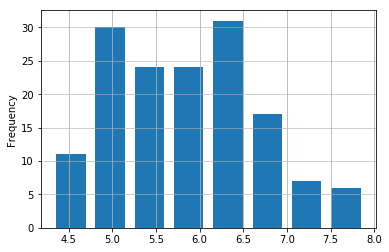

In [20]:
df['SepalLengthCm'].plot.hist(grid=True,bins=8,rwidth=0.75)
plt.grid(axis='y',alpha=0.75)

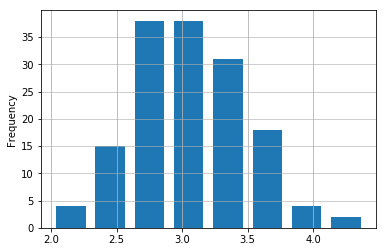

In [21]:
df['SepalWidthCm'].plot.hist(grid=True,bins=8,rwidth=0.75)
plt.grid(axis='y',alpha=0.75)

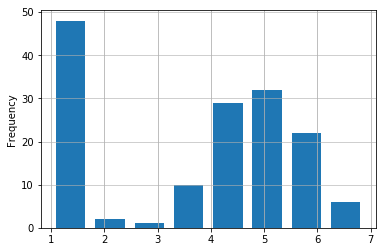

In [22]:
df['PetalLengthCm'].plot.hist(grid=True,bins=8,rwidth=0.75)
plt.grid(axis='y',alpha=0.75)

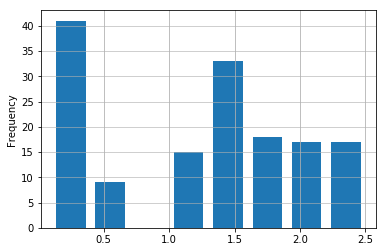

In [23]:
df['PetalWidthCm'].plot.hist(grid=True,bins=8,rwidth=0.75)
plt.grid(axis='y',alpha=0.75)

In [25]:
X=df.drop(['Id','Species'],axis=1)

In [26]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
Y=LabelEncoder().fit_transform(df['Species'])

In [36]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

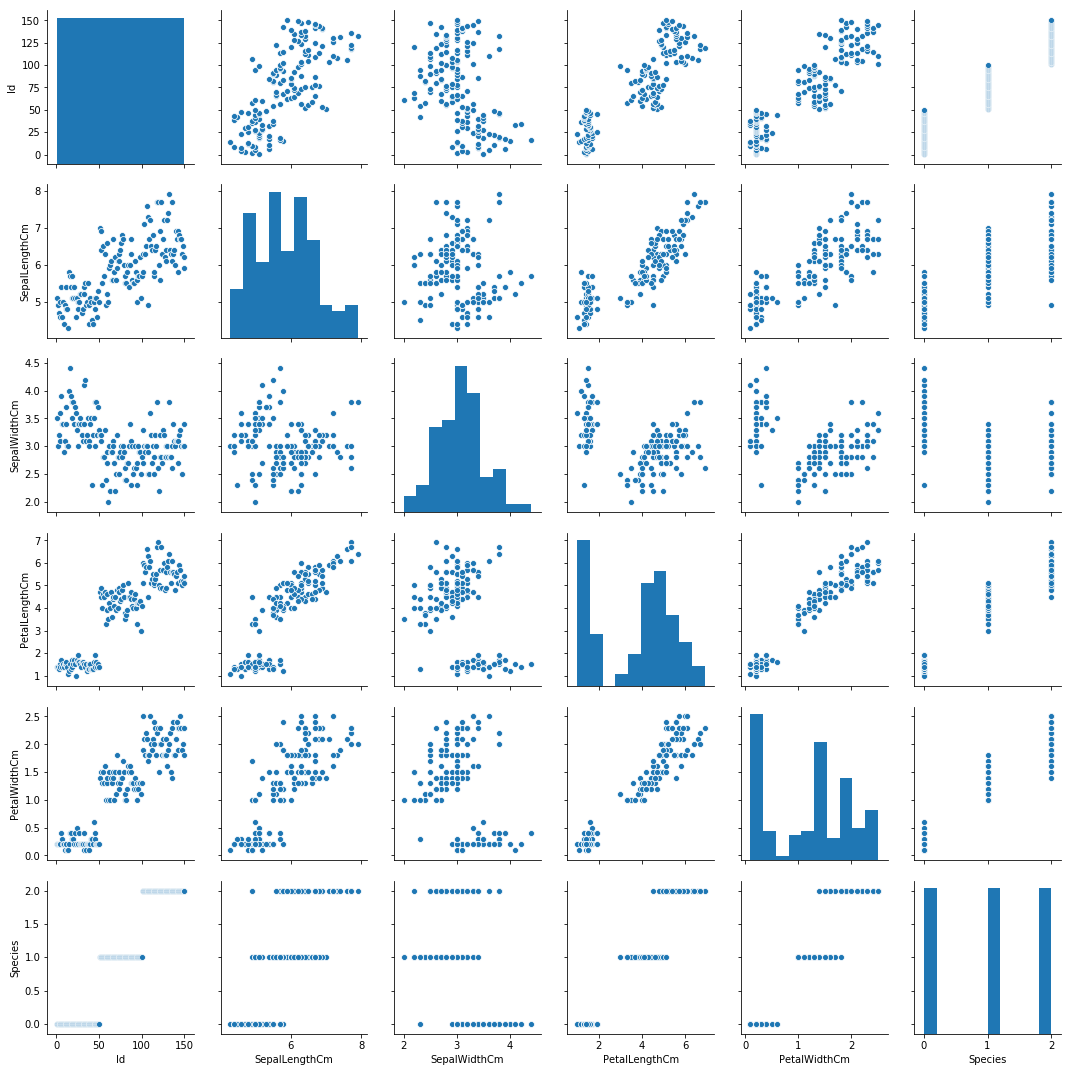

In [37]:
sns.pairplot(df)

In [39]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)
pred=knn.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,pred)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [51]:
knn.score(X_test,Y_test)

1.0

In [53]:
from sklearn import metrics
metrics.accuracy_score(Y_test,pred)

1.0

In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)
confusion_matrix(Y_test,pred)

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

In [56]:
lr.score(X_test,Y_test)

0.97777777777777775

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.97777777777777775, 0.97777777777777775]


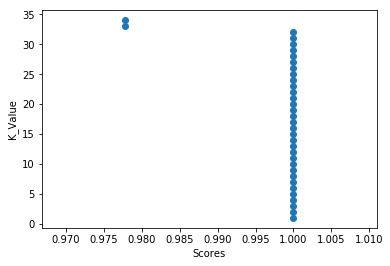

In [62]:
l_score=[]
for i in range(1,35):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,Y_train)
    l_score.append(knn.score(X_test,Y_test))
print(l_score)
plt.scatter(l_score,range(1,35))
plt.xlabel('Scores')
plt.ylabel('K_Value')